In [51]:
# LIBRARIES NECESSARY TO EXECUTE THE CODE

from IPython.display import Markdown, display   # To display our .md files in the notebook.
import pandas as pd                             # For analyzing, cleaning, exploring, and manipulating data.
import numpy as np                              # For arrays, linear algebra, and matrices.
import seaborn as sns                           # To visualize, explore and understand data.
import matplotlib.pyplot as plt                 # For creating visualizations.
from scipy.stats import norm
from scipy import stats  
from pylab import *
import warnings                         # Warnings will be displayed with some seaborn plots regarding future changes.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
# READ ME

display(Markdown("../Read_me.md"))


**Testing.**

In [3]:
# IMPORTING DATA FROM OUR EXCEL FILE

DATA_MAIN = pd.read_excel("../Files/creditcardmarketing.xlsx")

DATA_MAIN.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
# DATA - INFO VALUES

print(DATA_MAIN.info(),"\n\n",DATA_MAIN.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [5]:
# DATA CLEANING AND FORMATTING

# Standardize header names

def stcol(x):
    x.columns = [x.columns[i].lower().replace(' ', '_') for i in range(len(x.columns))]

stcol(DATA_MAIN)

DATA_MAIN.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [6]:
# Deal with NaN values.

def nan_to_mean(df, columns):
    for column in columns:
        df[column].fillna(df[column].mean(), inplace=True)

# This will change all NaN values in you "df" - Dataframe with their mean for any column/list of columns.

nan_to_mean(DATA_MAIN, ["average_balance", "q1_balance", "q2_balance", "q3_balance", "q4_balance"])

In [7]:
# Checking NaN values are dealt with.

DATA_MAIN.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
#_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
#_credit_cards_held     0
#_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [8]:
# Our data now seems correct and ready for analysis.

In [9]:
# Now that it's ready for EDA, we'll commence by having a look into our data types.

In [10]:
# DATA TYPES

# Numerical - Categorical

Numerical = DATA_MAIN.select_dtypes(include= np.number).columns.tolist()        # List of numeric columns
Categorical = DATA_MAIN.select_dtypes(include=object).columns.tolist()          # List of categorical columns

print(f"The following columns are numerical: {Numerical}\n\n")
print(f"The following columns are categorical: {Categorical}")

The following columns are numerical: ['customer_number', '#_bank_accounts_open', '#_credit_cards_held', '#_homes_owned', 'household_size', 'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']


The following columns are categorical: ['offer_accepted', 'reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home']


In [11]:
# Categorical - Recount


for x in range(len(Categorical) - 1):
    column_values = DATA_MAIN[Categorical[x]]

    # Shows count of categorical values in %
    percent_counts = (column_values.value_counts(dropna=False, normalize=True) * 100).round(1).astype(str) + '%'

    # Shows count of categoricals in units.
    unit_counts = column_values.value_counts(dropna=False)

    # Combine the two outputs horizontally (side by side)
    combined_output = pd.concat([percent_counts, unit_counts], axis=1)
    combined_output.columns = ['Percentage', 'Count']

    print(combined_output)
    print()


               Percentage  Count
offer_accepted                  
No                  94.3%  16977
Yes                  5.7%   1023

          Percentage  Count
reward                     
Air Miles      33.7%   6061
Cash Back      33.3%   5999
Points         33.0%   5940

            Percentage  Count
mailer_type                  
Postcard         50.8%   9147
Letter           49.2%   8853

             Percentage  Count
income_level                  
Medium            50.1%   9013
High              25.1%   4526
Low               24.8%   4461

                     Percentage  Count
overdraft_protection                  
No                        85.1%  15322
Yes                       14.9%   2678

              Percentage  Count
credit_rating                  
High               33.7%   6071
Medium             33.2%   5972
Low                33.1%   5957



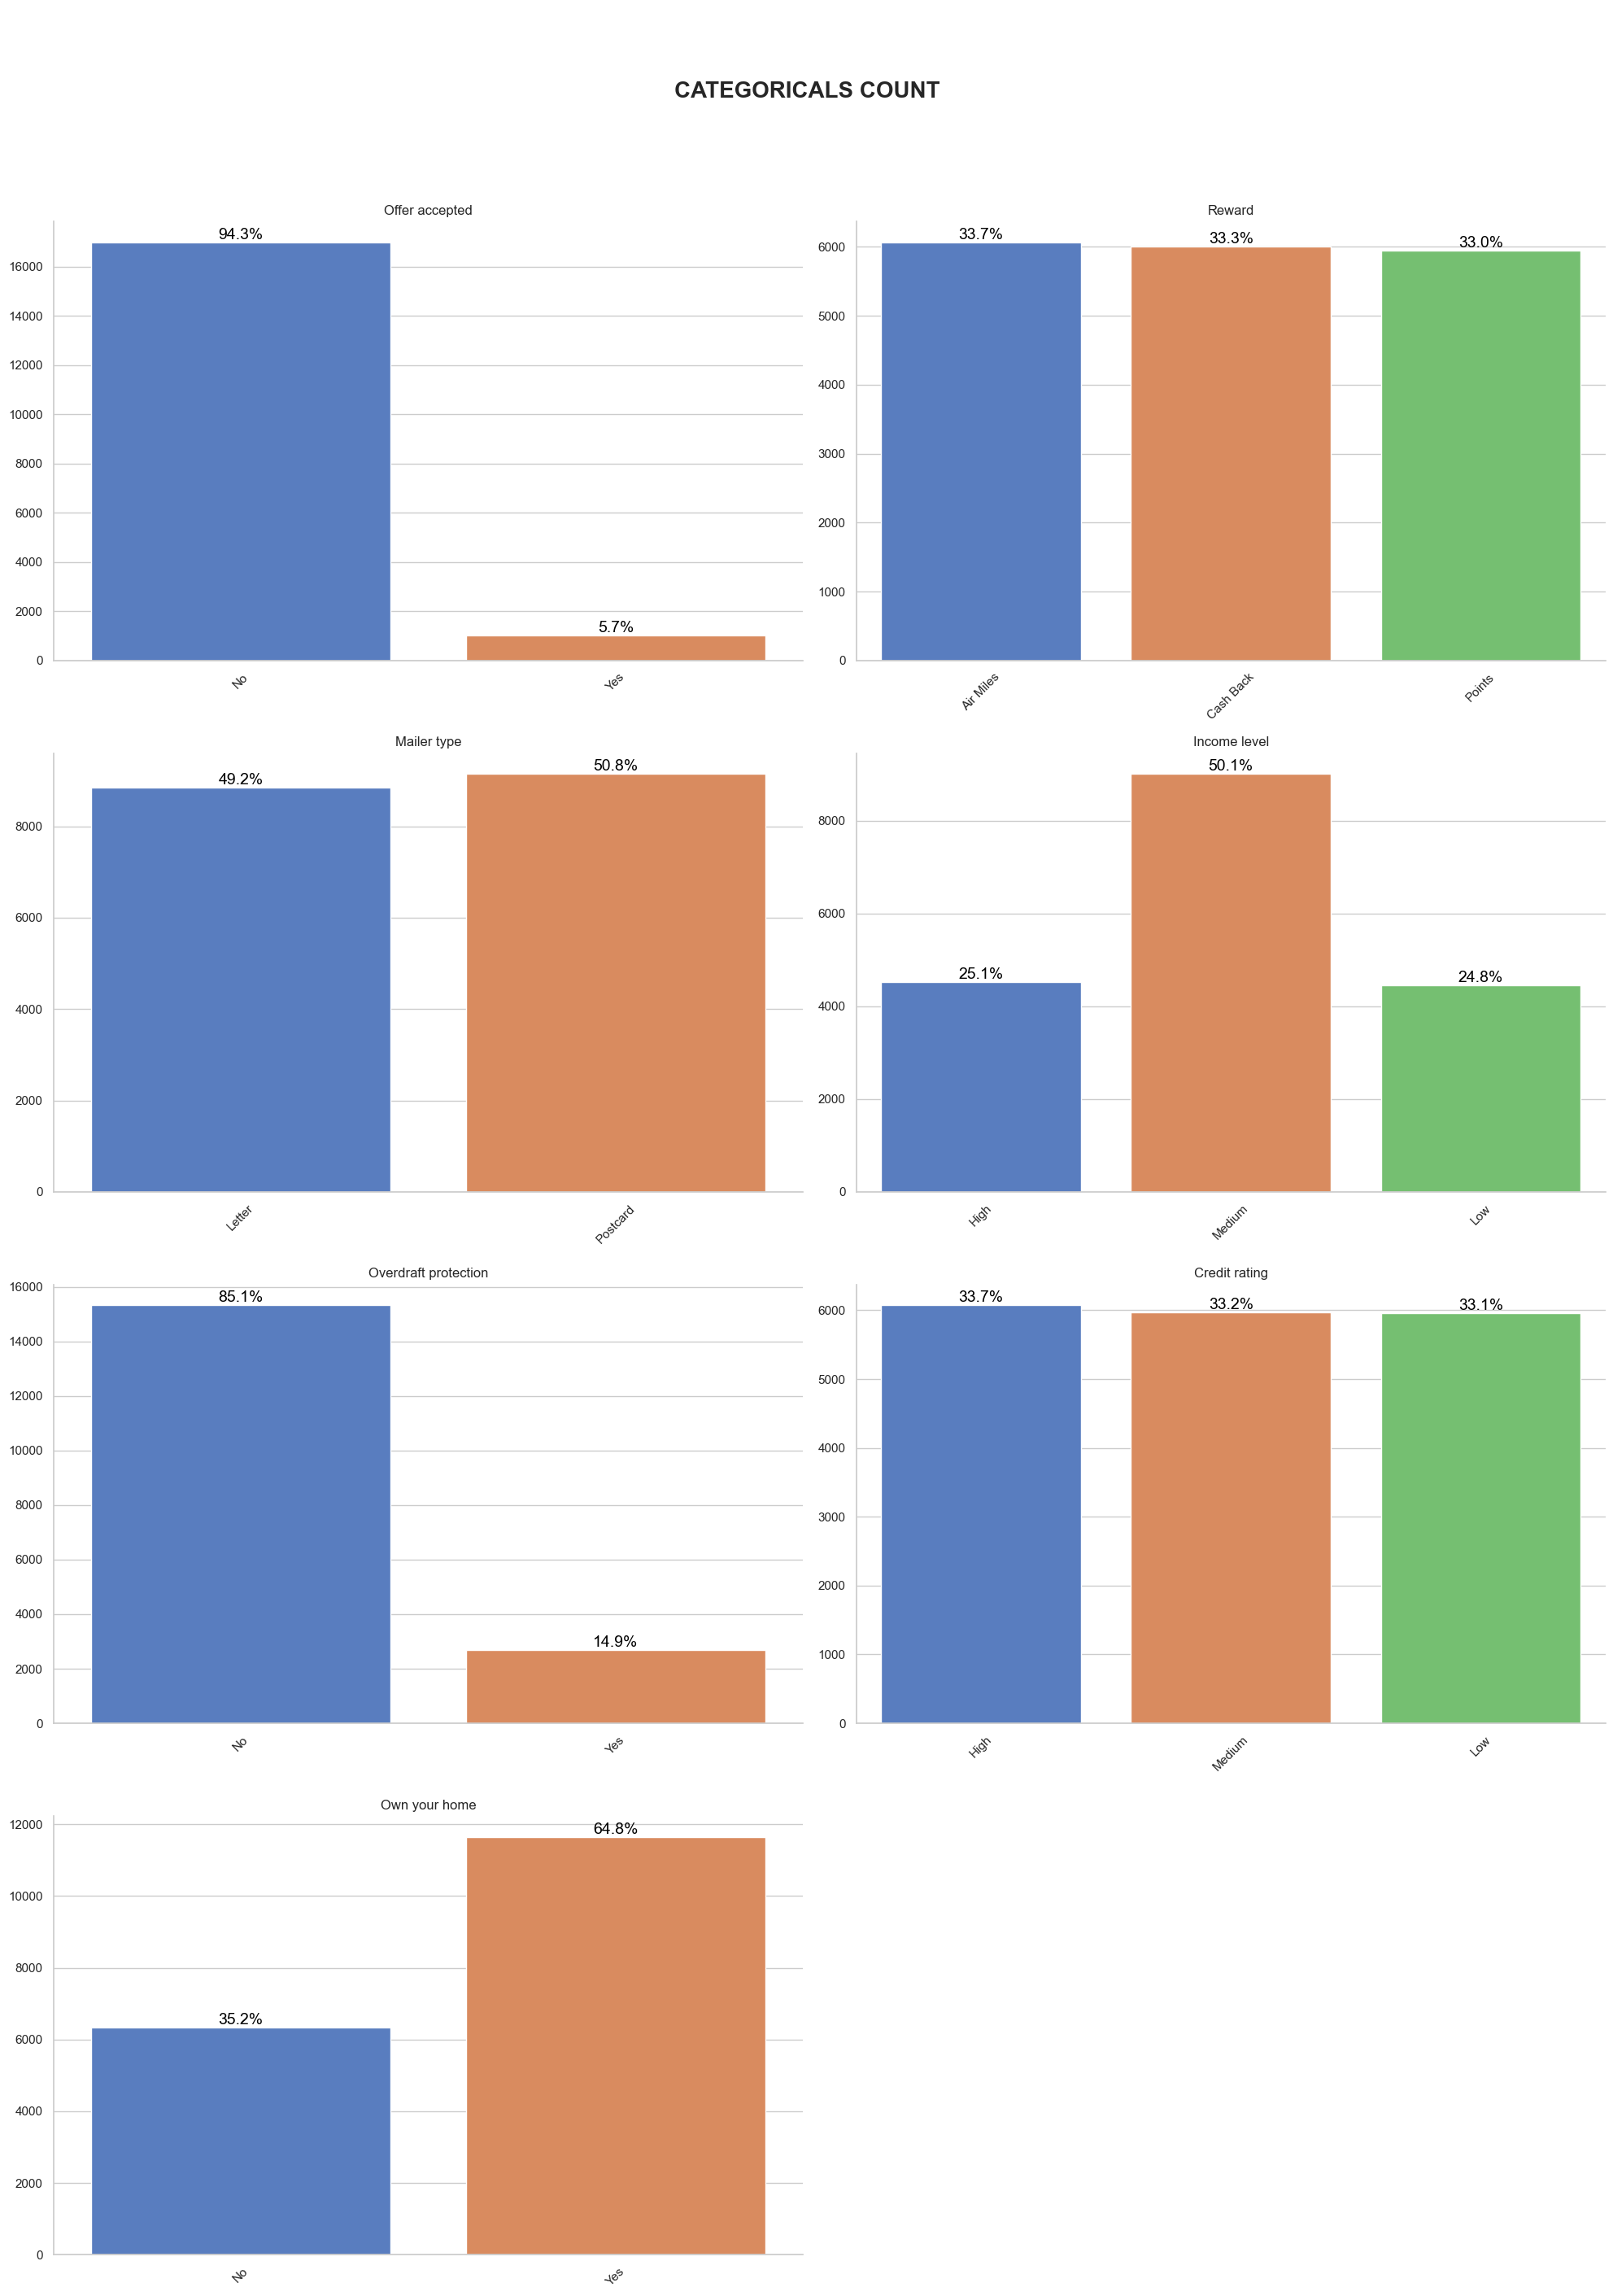

In [12]:
# CATEGORICALS (Visual Recount)

# Set a custom color palette
custom_palette = sns.color_palette("muted")

# Set style for the plot
sns.set(style="whitegrid", palette=custom_palette)

# Create the subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle("\n\n\nCATEGORICALS COUNT\n\n\n\n\n\n\n\n\n", fontsize=20, fontweight='bold', y=0.94)

total_categoricals = len(Categorical)

for i in range(4):
    for j in range(2):
        index = i * 2 + j

        if index < total_categoricals:
            sns.countplot(ax=axes[i, j], x=Categorical[index], data=DATA_MAIN).set(
                title=Categorical[index].capitalize().replace('_', ' '), xlabel=None
            )

            # Annotate each bar with its percentage label above the bar
            total_bars = len(DATA_MAIN)
            for p in axes[i, j].patches:
                height = p.get_height()
                percentage = f"{height / total_bars * 100:.1f}%"
                axes[i, j].annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                                    ha='center', va='bottom', fontsize=14, color='black')

            # Remove x-axis label
            axes[i, j].set_xlabel('')

            # Set y-axis label and font size
            axes[i, j].set_ylabel('')

            # Customize x-axis labels rotation for better visibility
            axes[i, j].tick_params(axis='x', labelrotation=45)

            # Remove right and top spines to clean up the plot
            sns.despine(right=True, top=True, ax=axes[i, j])

        else:
            axes[i, j].axis('off')  # Turn off the axis for the last empty plot

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




In [13]:
# Numerical Values 

# We will exclude the "Customer Number" column from our analysis as it serves solely for company identification purposes.
# Therefore, before proceeding with further examination, we will drop this column from the dataset.

DATA_MAIN.drop("customer_number", axis=1, inplace=True)

DATA_MAIN.head()

,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [14]:
# We now have the "customer_number" column removed from the list of numerical columns.

Numerical.remove("customer_number")

print(Numerical)


['#_bank_accounts_open', '#_credit_cards_held', '#_homes_owned', 'household_size', 'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']


In [15]:
# And proceed to study our numerical data with a quick insight.


# Create a variable to add our column
summary = DATA_MAIN[Numerical].describe()

# Calculate IQR for each numerical column
iqr = (DATA_MAIN[Numerical].quantile(0.75) - DATA_MAIN[Numerical].quantile(0.25)).rename('IQR')

# Add new values to our function.
summary.loc['IQR'] = iqr


print(summary.T)


""" This shows some variability in our average balance and Q1, Q2, Q3 and Q4 columns. """

                        count         mean         std    min       25%  \
#_bank_accounts_open  18000.0     1.255778    0.472501   1.00    1.0000   
#_credit_cards_held   18000.0     1.903500    0.797009   1.00    1.0000   
#_homes_owned         18000.0     1.203444    0.427341   1.00    1.0000   
household_size        18000.0     3.499056    1.114182   1.00    3.0000   
average_balance       18000.0   940.515562  350.064214  48.25  787.9375   
q1_balance            18000.0   910.450656  619.663515   0.00  393.0000   
q2_balance            18000.0   999.392190  457.097214   0.00  664.0000   
q3_balance            18000.0  1042.033600  553.083487   0.00  633.0000   
q4_balance            18000.0   810.185803  558.628553   0.00  363.7500   

                         50%        75%      max       IQR  
#_bank_accounts_open     1.0     1.0000     3.00     0.000  
#_credit_cards_held      2.0     2.0000     4.00     1.000  
#_homes_owned            1.0     1.0000     3.00     0.000  
house

' This shows some variability in our average balance and Q1, Q2, Q3 and Q4 columns. '

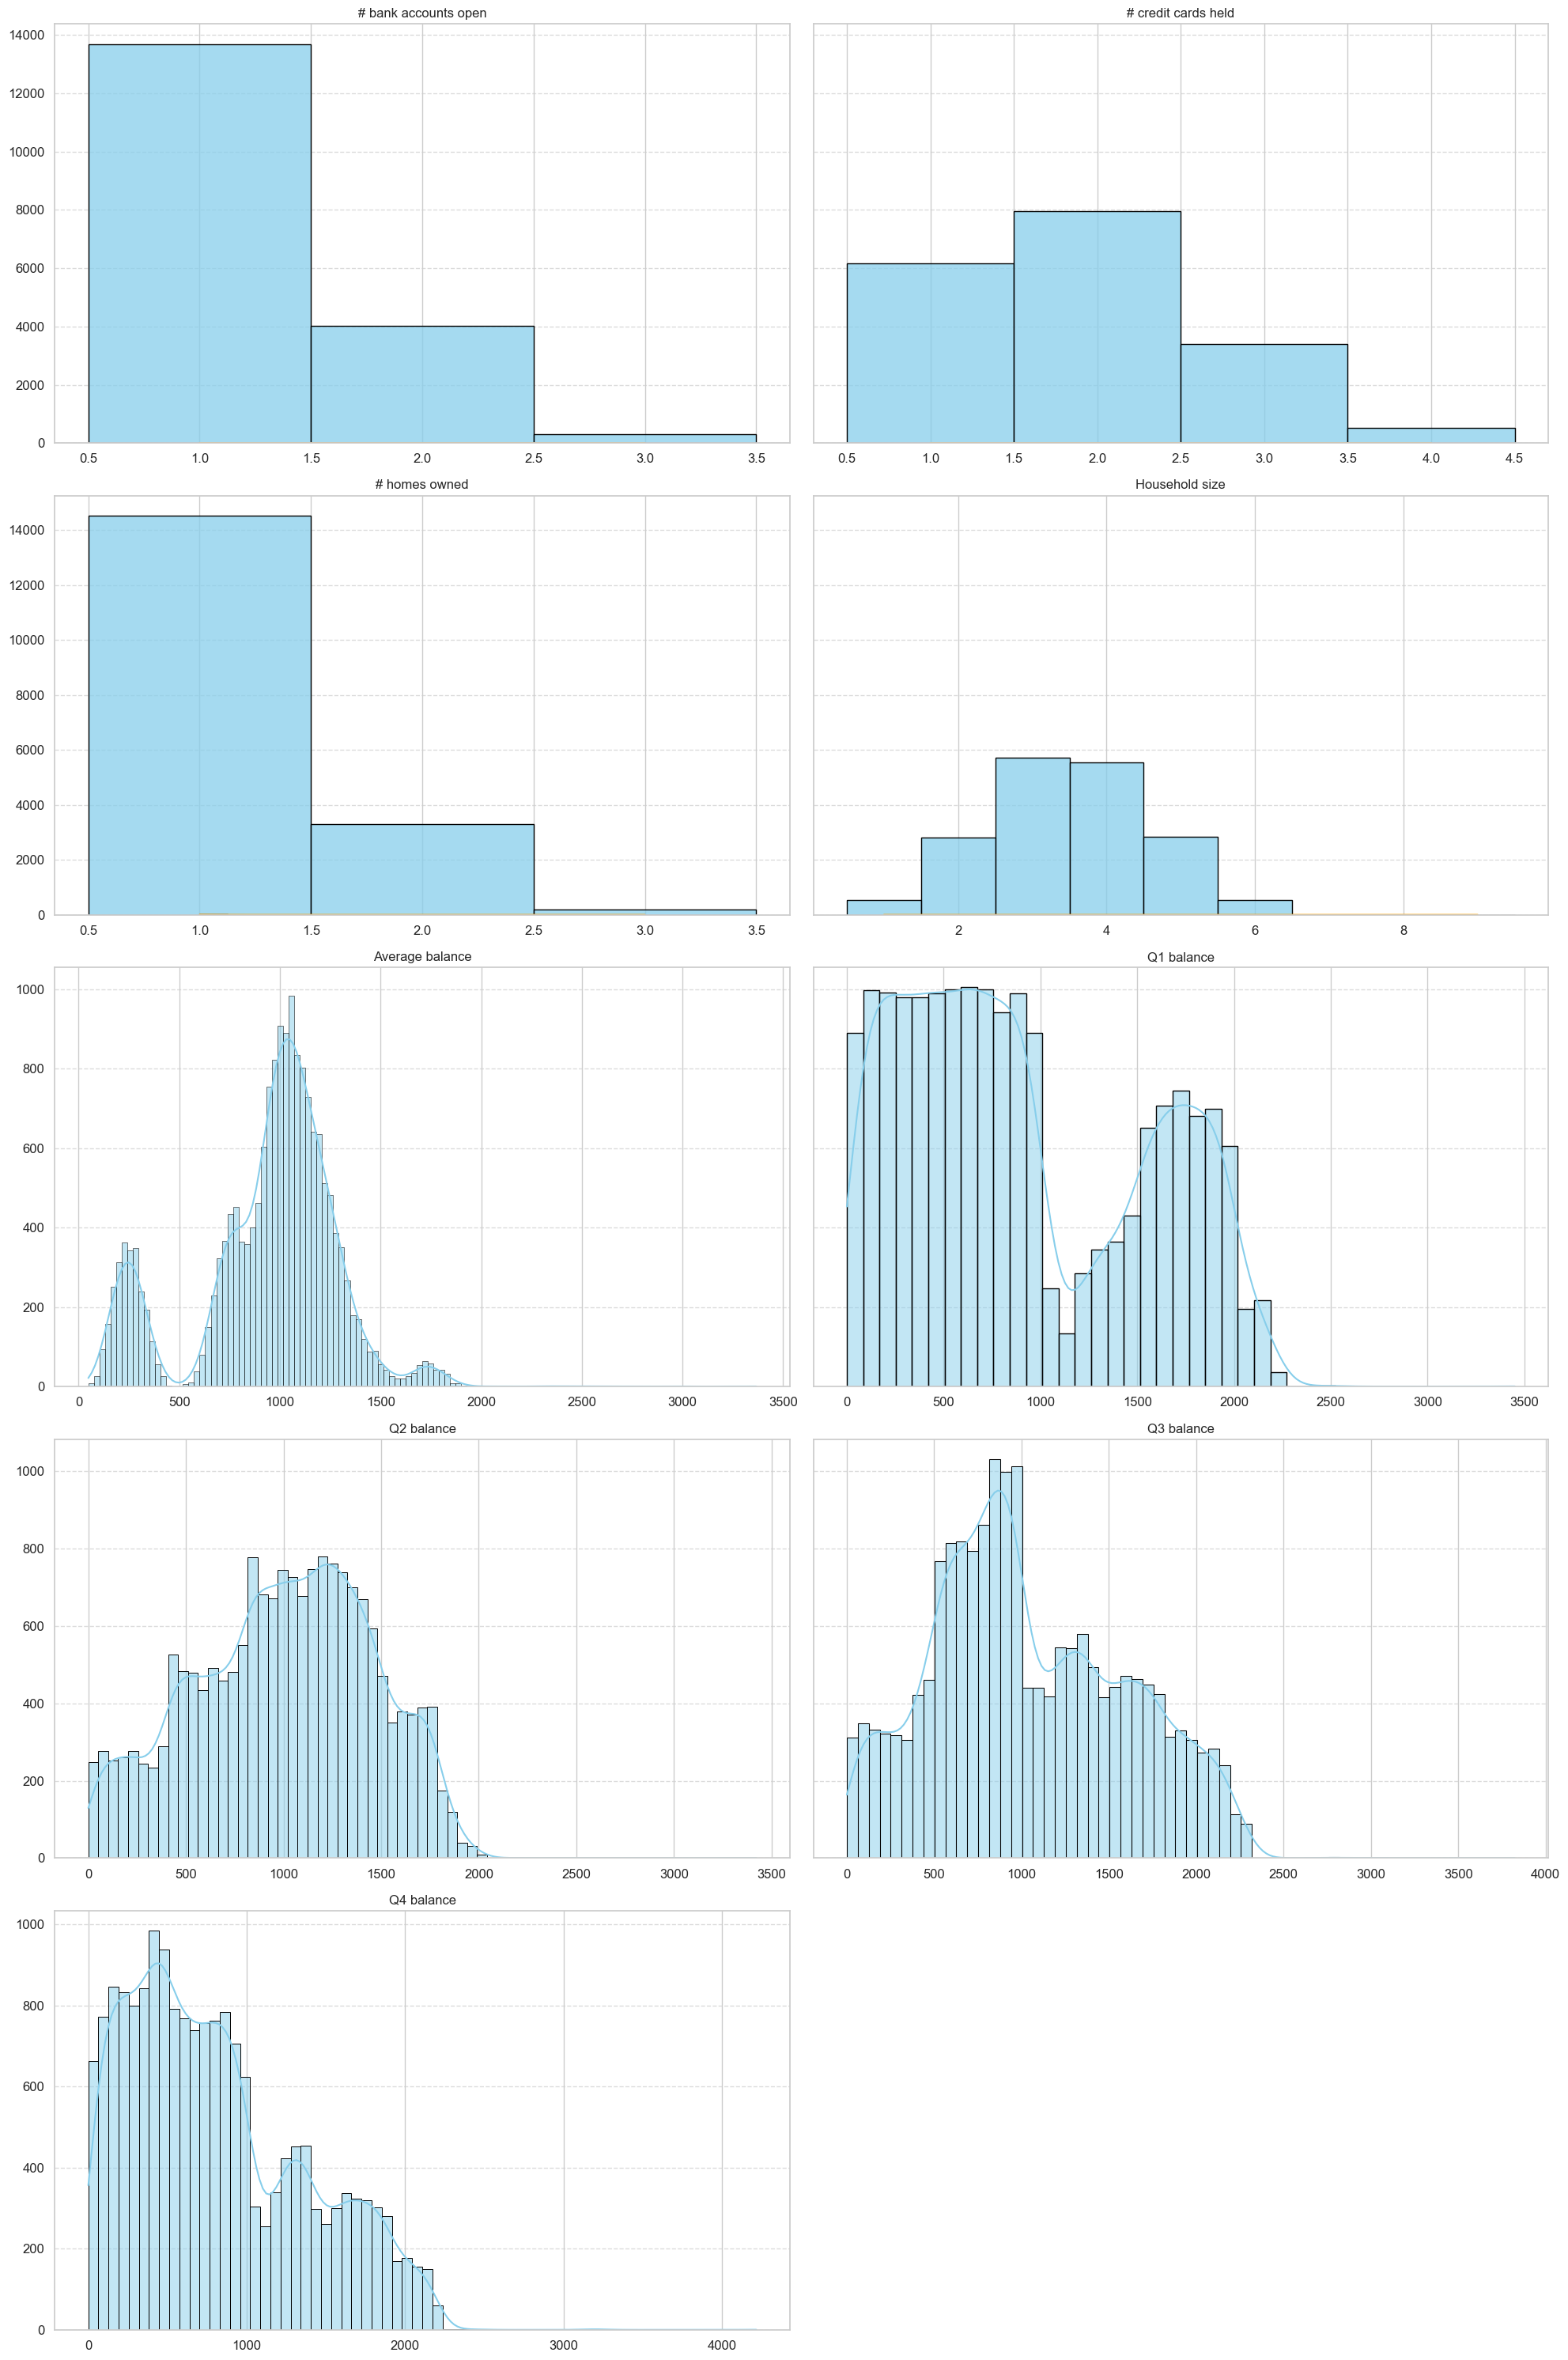

In [39]:
# Create subplots with adjusted height ratios to leave space for common y-axis label
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 30), sharey='row', gridspec_kw={'height_ratios': [3, 3, 3, 3, 3]})

columns = ['#_bank_accounts_open', '#_credit_cards_held', '#_homes_owned', 'household_size',
           'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

for i, column in enumerate(columns):
    if column in ['#_bank_accounts_open', '#_credit_cards_held', '#_homes_owned', 'household_size']:
        sns.histplot(DATA_MAIN[column], kde=False, discrete=True, ax=axs[i//2, i%2], color='skyblue', edgecolor='black')
        sns.histplot(DATA_MAIN[column], kde=True, stat="density", ax=axs[i//2, i%2], color='orange', edgecolor='black')
    else:
        sns.histplot(DATA_MAIN[column], kde=True, ax=axs[i//2, i%2], color='skyblue', edgecolor='black')
    axs[i//2, i%2].set(title=column.replace('_', ' ').capitalize(), xlabel=None)
    axs[i//2, i%2].set_ylabel('')
    axs[i//2, i%2].tick_params(axis='both', labelsize=12)
    axs[i//2, i%2].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i//2, i%2].set_xlabel('')

# Hide any empty subplots if the number of columns is not enough for a full row
if len(columns) % 2 != 0:
    axs[-1, -1].axis("off")

# Adjust layout to avoid overlapping titles and axis labels
plt.tight_layout()

# Show the plots
plt.show()



In [53]:
# ML - LOGISTIC REGRESSION


# Assuming 'DATA_MAIN' is your DataFrame and 'offer_accepted' is the objective column.
# Create a copy of the main DataFrame to work with
DATA_COPY = DATA_MAIN.copy()

# Step 1: Label Encoding on the objective column "offer_accepted"
label_encoder = LabelEncoder()
DATA_COPY['offer_accepted'] = label_encoder.fit_transform(DATA_COPY['offer_accepted'])

# Step 2: OneHotEncoder on the other categorical columns
categorical_columns = ['reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home']

# Perform OneHotEncoding on the categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categorical_columns)],
                       remainder='passthrough')
encoded_categorical = ct.fit_transform(DATA_COPY)

# Get the feature names for the one-hot encoded columns
encoded_feature_names = []
for col_name in categorical_columns:
    col_categories = DATA_MAIN[col_name].unique()[1:]  # Drop the first category (drop='first')
    for cat in col_categories:
        encoded_feature_names.append(f"{col_name}_{cat}")

# Create a DataFrame with the encoded data and feature names
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_feature_names + DATA_COPY.columns[len(categorical_columns):].tolist())

# Drop the original categorical columns and concatenate the encoded data with the rest of the DataFrame
DATA_COPY.drop(columns=categorical_columns, inplace=True)
DATA_COPY = pd.concat([encoded_categorical_df, DATA_COPY], axis=1)

# Step 3: Applying the Logistic Regression model
X = DATA_COPY.drop(columns=['offer_accepted'])
y = DATA_COPY['offer_accepted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)




Accuracy: 0.9994444444444445
Confusion Matrix:
 [[3387    0]
 [   2  211]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3387
           1       1.00      0.99      1.00       213

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



In [ ]:
""" - Precision: The precision is the proportion of true positive predictions (TP)
 among all positive predictions (TP + FP).A precision of 1.00 (or 100%) means that 
 all the samples predicted as positive (class 1) were correctly predicted.
- Recall: The recall is the proportion of true positive predictions (TP) among 
all actual positive samples (TP + FN). A recall of 0.99 (or 99%) means that the 
model correctly identified 99% of the actual positive samples.
- F1-score: The F1-score is the harmonic mean of precision and recall and provides 
a balance between the two metrics. It is useful when classes are imbalanced.
- Support: The support indicates the number of samples in each class in the test set.

Overall, the results indicate that the model has performed exceptionally well,
 achieving very high accuracy and high precision and recall for both classes. 
 The model correctly predicted the vast majority of samples, and there were only 
 a few misclassifications. This suggests that the logistic regression model is
   performing very effectively on the given dataset. However, it is important 
   to be cautious of potential issues such as overfitting or class imbalances,
     especially when the dataset is heavily imbalanced or the model is evaluated
       on the same data used for training. """